In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print("Imports successful!")

Imports successful!


In [4]:
properties_2016 = pd.read_csv('properties_2016.csv', low_memory=False)
properties_2017 = pd.read_csv('properties_2017.csv', low_memory=False)
train_2016 = pd.read_csv('train_2016_v2.csv', low_memory=False)
train_2017 = pd.read_csv('train_2017.csv', low_memory=False)

In [5]:
# Display first few rows and summary of the datasets
print("Properties 2016:")
print(properties_2016.head())
print(properties_2016.info())

print("\nProperties 2017:")
print(properties_2017.head())
print(properties_2017.info())

print("\nTrain 2016:")
print(train_2016.head())
print(train_2016.info())

print("\nTrain 2017:")
print(train_2017.head())
print(train_2017.info())



Properties 2016:
   parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  ...  numberofstories  fireplaceflag

In [6]:
# Check for missing values
missing_2016 = properties_2016.isnull().sum()
missing_2017 = properties_2017.isnull().sum()

# Display columns with missing values
missing_2016[missing_2016 > 0].sort_values(ascending=False)
missing_2017[missing_2017 > 0].sort_values(ascending=False)

storytypeid                     2983594
basementsqft                    2983590
yardbuildingsqft26              2982571
fireplaceflag                   2980054
architecturalstyletypeid        2979156
typeconstructiontypeid          2978471
finishedsquarefeet13            2977546
buildingclasstypeid             2972486
pooltypeid10                    2968211
decktypeid                      2967838
finishedsquarefeet6             2963735
poolsizesum                     2957259
pooltypeid2                     2952161
hashottuborspa                  2935155
taxdelinquencyflag              2928702
taxdelinquencyyear              2928700
yardbuildingsqft17              2903629
finishedsquarefeet15            2795032
finishedfloor1squarefeet        2781459
finishedsquarefeet50            2781459
fireplacecnt                    2672093
threequarterbathnbr             2668860
pooltypeid7                     2479322
poolcnt                         2445585
numberofstories                 2299541


In [7]:
# Set threshold (50% missing values)
threshold = len(properties_2016) * 0.5

# Drop columns with missing values exceeding the threshold
properties_2016_cleaned = properties_2016.dropna(thresh=threshold, axis=1)
properties_2017_cleaned = properties_2017.dropna(thresh=threshold, axis=1)

# Check remaining columns
properties_2016_cleaned.info()
properties_2017_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 29 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bathroomcnt                   float64
 2   bedroomcnt                    float64
 3   buildingqualitytypeid         float64
 4   calculatedbathnbr             float64
 5   calculatedfinishedsquarefeet  float64
 6   finishedsquarefeet12          float64
 7   fips                          float64
 8   fullbathcnt                   float64
 9   heatingorsystemtypeid         float64
 10  latitude                      float64
 11  longitude                     float64
 12  lotsizesquarefeet             float64
 13  propertycountylandusecode     object 
 14  propertylandusetypeid         float64
 15  propertyzoningdesc            object 
 16  rawcensustractandblock        float64
 17  regionidcity                  float64
 18  regionidcounty        

In [8]:
# Fill missing values in numerical columns with the median
numeric_cols_2016 = properties_2016_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_2017 = properties_2017_cleaned.select_dtypes(include=['float64', 'int64']).columns

properties_2016_cleaned[numeric_cols_2016] = properties_2016_cleaned[numeric_cols_2016].fillna(properties_2016_cleaned[numeric_cols_2016].median())
properties_2017_cleaned[numeric_cols_2017] = properties_2017_cleaned[numeric_cols_2017].fillna(properties_2017_cleaned[numeric_cols_2017].median())

# Fill missing values in categorical columns with the mode
categorical_cols = ['propertycountylandusecode', 'propertyzoningdesc']
for col in categorical_cols:
    properties_2016_cleaned[col].fillna(properties_2016_cleaned[col].mode()[0], inplace=True)
    properties_2017_cleaned[col].fillna(properties_2017_cleaned[col].mode()[0], inplace=True)

# Verify no missing values remain
print(properties_2016_cleaned.isnull().sum())
print(properties_2017_cleaned.isnull().sum())

/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/4170301363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2016_cleaned[numeric_cols_2016] = properties_2016_cleaned[numeric_cols_2016].fillna(properties_2016_cleaned[numeric_cols_2016].median())
/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/4170301363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2017_cleaned[numeric_cols_2017] = properties_2017_cleaned[numeric_cols_2017].fillna(properties_2017

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
dtype: int64
p

In [9]:
# Create a new feature 'property_age'
properties_2016_cleaned['property_age'] = 2024 - properties_2016_cleaned['yearbuilt']
properties_2017_cleaned['property_age'] = 2024 - properties_2017_cleaned['yearbuilt']

# Check the new feature
print(properties_2016_cleaned[['yearbuilt', 'property_age']].head())
print(properties_2017_cleaned[['yearbuilt', 'property_age']].head())

   yearbuilt  property_age
0     1963.0          61.0
1     1963.0          61.0
2     1963.0          61.0
3     1948.0          76.0
4     1947.0          77.0
   yearbuilt  property_age
0     1963.0          61.0
1     1963.0          61.0
2     1959.0          65.0
3     1948.0          76.0
4     1947.0          77.0


/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/1724405258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2016_cleaned['property_age'] = 2024 - properties_2016_cleaned['yearbuilt']
/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/1724405258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2017_cleaned['property_age'] = 2024 - properties_2017_cleaned['yearbuilt']


In [10]:
# Apply log transformation to reduce skewness
properties_2016_cleaned['log_taxamount'] = np.log1p(properties_2016_cleaned['taxamount'])
properties_2017_cleaned['log_taxamount'] = np.log1p(properties_2017_cleaned['taxamount'])

properties_2016_cleaned['log_taxvaluedollarcnt'] = np.log1p(properties_2016_cleaned['taxvaluedollarcnt'])
properties_2017_cleaned['log_taxvaluedollarcnt'] = np.log1p(properties_2017_cleaned['taxvaluedollarcnt'])

# Check the new log-transformed features
print(properties_2016_cleaned[['taxamount', 'log_taxamount']].head())
print(properties_2017_cleaned[['taxamount', 'log_taxamount']].head())


   taxamount  log_taxamount
0    3991.78       8.292243
1    3991.78       8.292243
2   20800.37       9.942774
3   14557.57       9.585935
4    5725.17       8.652802
   taxamount  log_taxamount
0    4007.62       8.296202
1    4007.62       8.296202
2   20800.37       9.942774
3   14557.57       9.585935
4    5725.17       8.652802


/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/3199823390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2016_cleaned['log_taxamount'] = np.log1p(properties_2016_cleaned['taxamount'])
/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/3199823390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2017_cleaned['log_taxamount'] = np.log1p(properties_2017_cleaned['taxamount'])
/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/3199823390.py:

In [11]:
# Frequency encoding for high-cardinality categorical features
for col in ['propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc']:
    # Apply frequency encoding to each column
    properties_2016_cleaned[col + '_freq'] = properties_2016_cleaned[col].map(properties_2016_cleaned[col].value_counts())
    properties_2017_cleaned[col + '_freq'] = properties_2017_cleaned[col].map(properties_2017_cleaned[col].value_counts())

# Drop original high-cardinality columns to avoid memory overload
properties_2016_encoded = properties_2016_cleaned.drop(columns=['propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc'])
properties_2017_encoded = properties_2017_cleaned.drop(columns=['propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc'])

# Check the new dataframes
print(properties_2016_encoded.head())
print(properties_2017_encoded.head())

/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/3245236061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2016_cleaned[col + '_freq'] = properties_2016_cleaned[col].map(properties_2016_cleaned[col].value_counts())
/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/3245236061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_2017_cleaned[col + '_freq'] = properties_2017_cleaned[col].map(properties_2017_cleaned[col].value_counts())
/var/folders/_j/8jp4

   parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  10754147          0.0         0.0                    7.0   
1  10759547          0.0         0.0                    7.0   
2  10843547          0.0         0.0                    7.0   
3  10859147          0.0         0.0                    7.0   
4  10879947          0.0         0.0                    7.0   

   calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                2.0                        1572.0                1539.0   
1                2.0                        1572.0                1539.0   
2                2.0                       73026.0                1539.0   
3                2.0                        5068.0                1539.0   
4                2.0                        1776.0                1539.0   

     fips  fullbathcnt  heatingorsystemtypeid  ...  assessmentyear  \
0  6037.0          2.0                    2.0  ...          2015.0   
1  6037.0          2.0  

In [12]:
print(properties_2016_encoded.columns)
print(properties_2017_encoded.columns)

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock', 'property_age', 'log_taxamount',
       'log_taxvaluedollarcnt', 'propertycountylandusecode_freq',
       'propertylandusetypeid_freq', 'propertyzoningdesc_freq'],
      dtype='object')
Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'rawcensustracta

In [13]:
# For 2016 Data
X_2016 = properties_2016_encoded.drop(columns=['taxvaluedollarcnt', 'parcelid'])
y_2016 = properties_2016_encoded['taxvaluedollarcnt']

# For 2017 Data
X_2017 = properties_2017_encoded.drop(columns=['taxvaluedollarcnt', 'parcelid'])
y_2017 = properties_2017_encoded['taxvaluedollarcnt']

# Check the shapes of the datasets
print(X_2016.shape, y_2016.shape)
print(X_2017.shape, y_2017.shape)

(2985217, 30) (2985217,)
(2985217, 30) (2985217,)


In [14]:
# Get the common columns between X_2016 and X_2017
common_cols = list(set(X_2016.columns) & set(X_2017.columns))

# Select only the common columns for scaling
X_2016_common = X_2016[common_cols]
X_2017_common = X_2017[common_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_2016_scaled = scaler.fit_transform(X_2016_common)

# Transform the 2017 data (using the same scaler)
X_2017_scaled = scaler.transform(X_2017_common)

# Check the scaled data
print(X_2016_scaled[:5])  # Display first 5 rows of scaled data
print(X_2017_scaled[:5])


[[ 1.46619927e-02 -5.86288008e-02 -1.09631201e+01  5.77658916e-02
   6.70988645e-02 -1.38879421e-01 -5.43878904e-01 -1.31219998e+00
  -2.42544057e+00 -5.23767522e-01 -4.43630062e-01  6.71339305e-01
   5.32767446e-02 -5.32767446e-02 -6.01816471e-02 -1.90099424e+00
   5.88467036e-01  2.00254081e-01 -2.05281762e+00 -1.50100656e-01
   5.03868427e-01 -1.18985804e-01 -3.29549007e-01 -2.16292177e-01
  -1.14565100e+00 -2.40639041e-01 -5.18031624e-01  1.15263338e+00
  -2.91951121e-01 -5.69232984e-01]
 [ 1.46619927e-02 -5.86288008e-02 -2.49152189e+00  5.77658916e-02
   6.70988645e-02 -1.38879421e-01 -5.43878904e-01 -1.22887141e+00
  -2.42544057e+00 -5.23772658e-01 -4.43630062e-01  6.71339305e-01
   5.32767446e-02 -5.32767446e-02 -6.01816471e-02  6.13056228e-01
   5.71950959e-01 -5.37143019e-02 -2.05281762e+00 -1.50100656e-01
   5.03868427e-01 -1.18985804e-01 -3.29549007e-01 -2.16292177e-01
  -1.26652160e+00 -2.40639041e-01 -5.18031624e-01 -8.73053233e-01
  -2.91951121e-01 -5.06734048e-01]
 [ 1.4

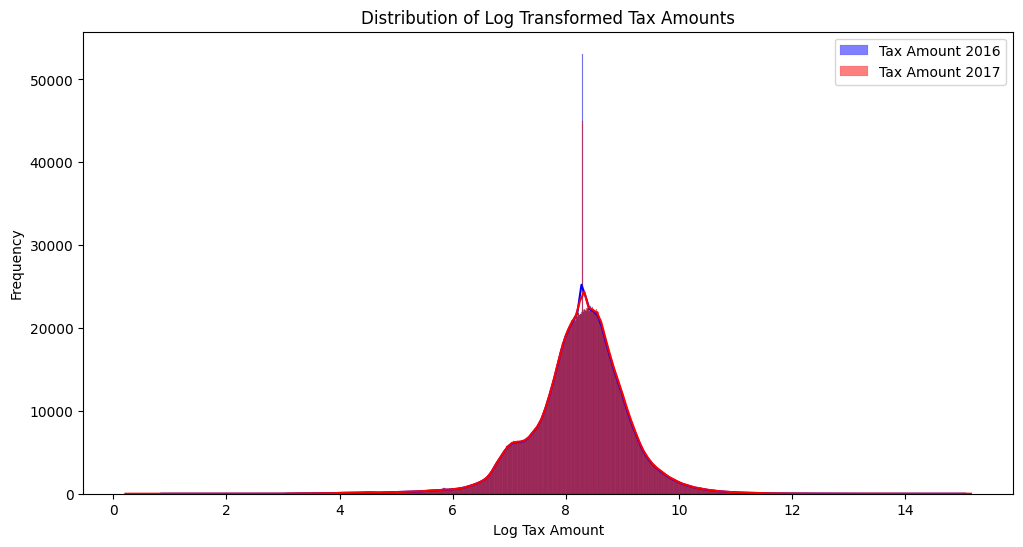

In [15]:
# Distribution of Tax Amounts (Log Transformed)
plt.figure(figsize=(12, 6))
sns.histplot(properties_2016_cleaned['log_taxamount'], kde=True, color='blue', label='Tax Amount 2016')
sns.histplot(properties_2017_cleaned['log_taxamount'], kde=True, color='red', label='Tax Amount 2017')
plt.title('Distribution of Log Transformed Tax Amounts')
plt.xlabel('Log Tax Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


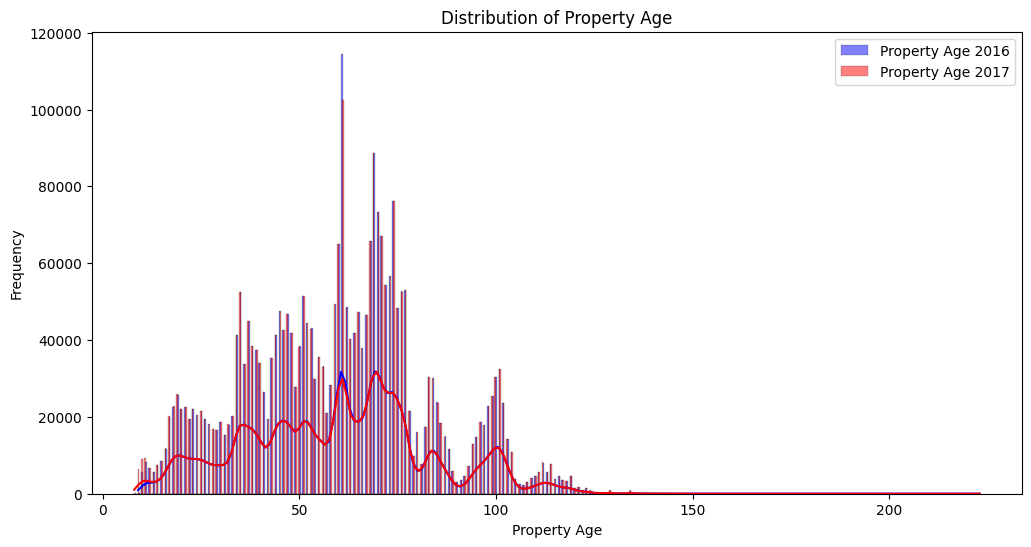

In [16]:
# Distribution of Property Age
plt.figure(figsize=(12, 6))
sns.histplot(properties_2016_cleaned['property_age'], kde=True, color='blue', label='Property Age 2016')
sns.histplot(properties_2017_cleaned['property_age'], kde=True, color='red', label='Property Age 2017')
plt.title('Distribution of Property Age')
plt.xlabel('Property Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

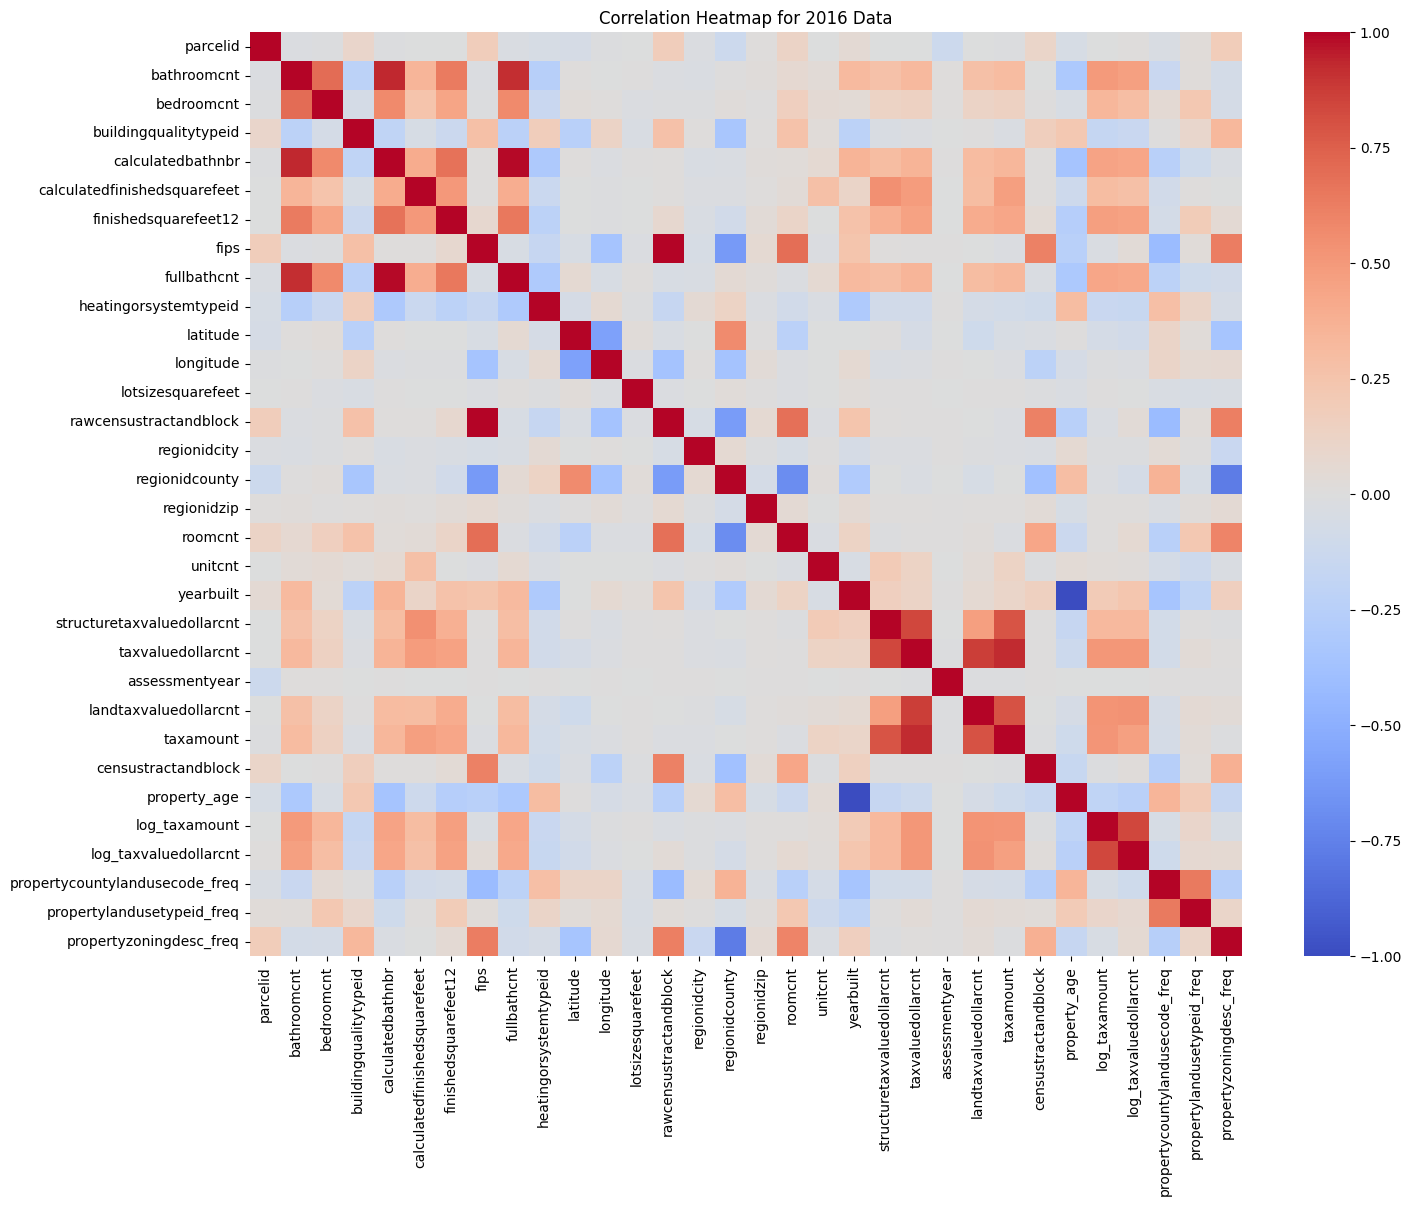

In [17]:
# Correlation Heatmap for 2016 Data
plt.figure(figsize=(16, 12))
sns.heatmap(properties_2016_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap for 2016 Data')
plt.show()

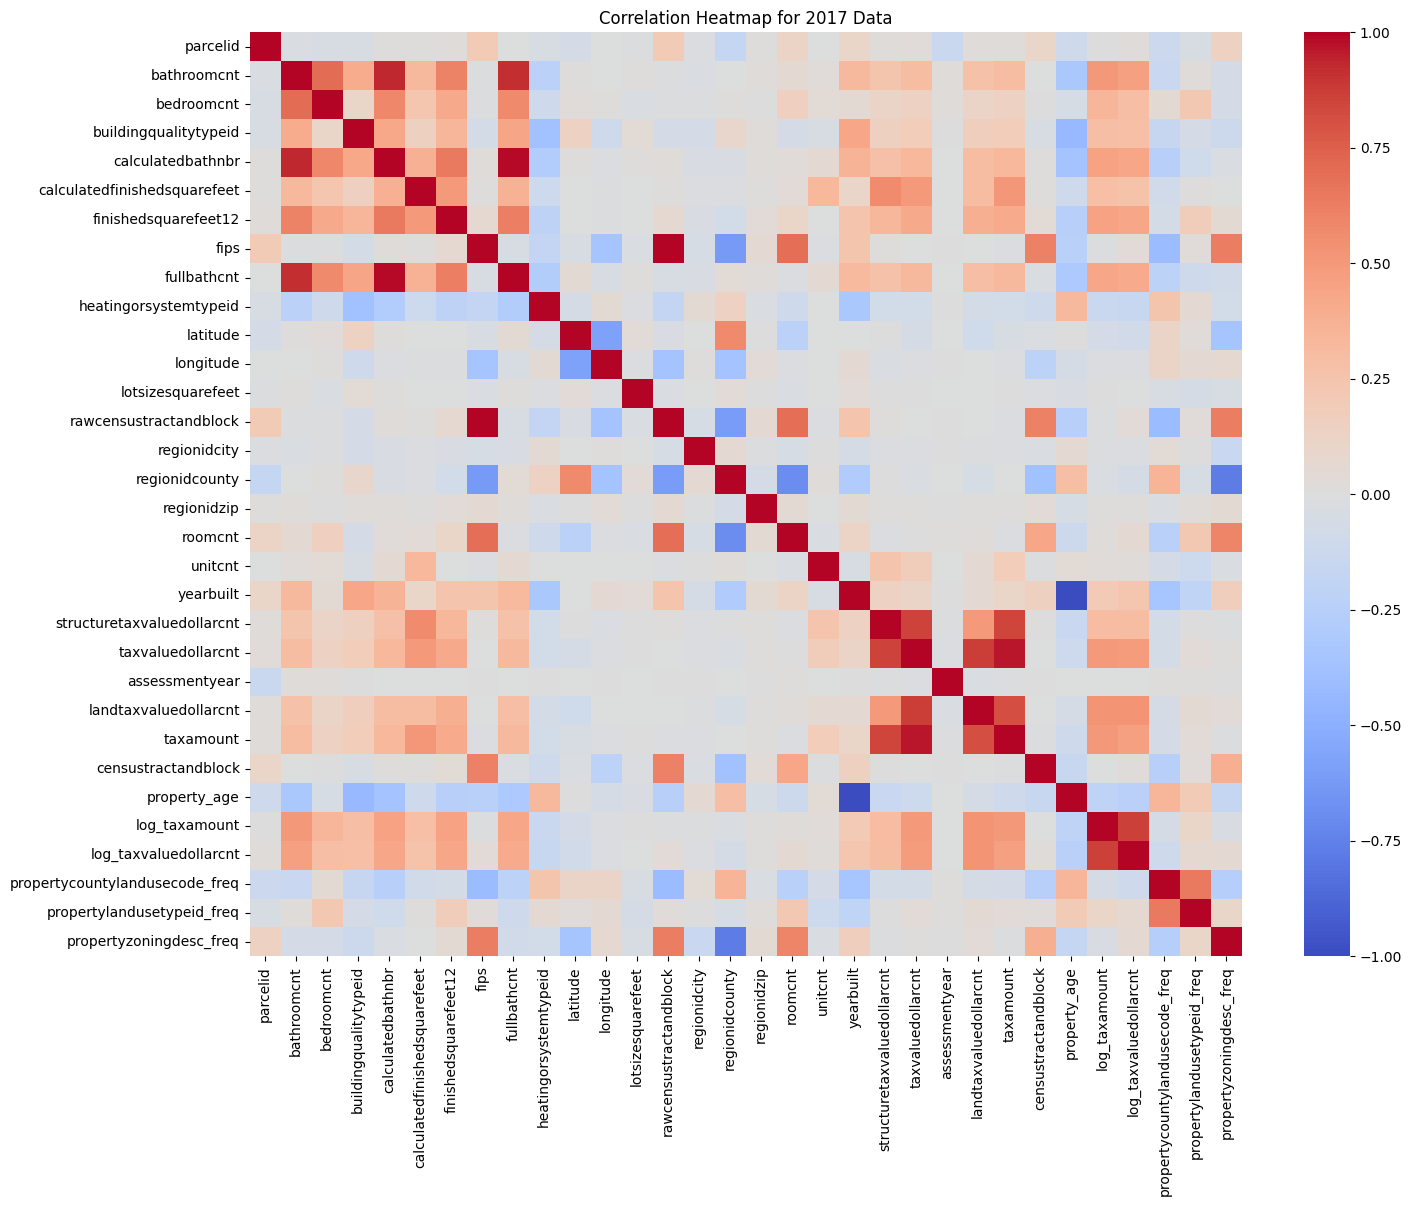

In [18]:
# Correlation Heatmap for 2017 Data
plt.figure(figsize=(16, 12))
sns.heatmap(properties_2017_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap for 2017 Data')
plt.show()

/Users/prakharmathur/JPMC5/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


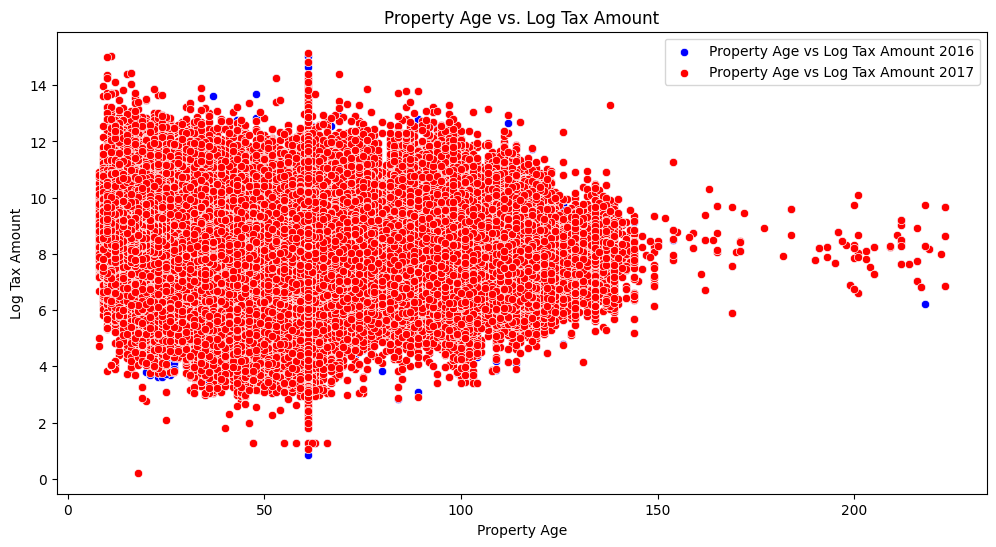

In [19]:
# Scatter plot of Property Age vs. Log Tax Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x=properties_2016_cleaned['property_age'], y=properties_2016_cleaned['log_taxamount'], color='blue', label='Property Age vs Log Tax Amount 2016')
sns.scatterplot(x=properties_2017_cleaned['property_age'], y=properties_2017_cleaned['log_taxamount'], color='red', label='Property Age vs Log Tax Amount 2017')
plt.title('Property Age vs. Log Tax Amount')
plt.xlabel('Property Age')
plt.ylabel('Log Tax Amount')
plt.legend()
plt.show()

In [20]:
sample_size = min(10000, len(X_2016_scaled), len(X_2017_scaled))
X_2016_sample = X_2016_scaled[:sample_size]
y_2016_sample = y_2016[:sample_size]
X_2017_sample = X_2017_scaled[:sample_size]
y_2017_sample = y_2017[:sample_size]

model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)
cv_scores = cross_val_score(model, X_2016_sample, y_2016_sample, cv=3, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE scores: {cv_rmse}')
print(f'Mean CV RMSE: {cv_rmse.mean():.3f}, Std CV RMSE: {cv_rmse.std():.3f}')
model.fit(X_2016_sample, y_2016_sample)
y_pred_2017 = model.predict(X_2017_sample)

rmse = np.sqrt(mean_squared_error(y_2017_sample, y_pred_2017))
r2 = r2_score(y_2017_sample, y_pred_2017)

print(rmse)
print(r2)

Cross-Validation RMSE scores: [226200.89743383 104936.47642576   1751.29404627]
Mean CV RMSE: 110962.889, Std CV RMSE: 91730.200
52363.80872465372
0.994269029313745


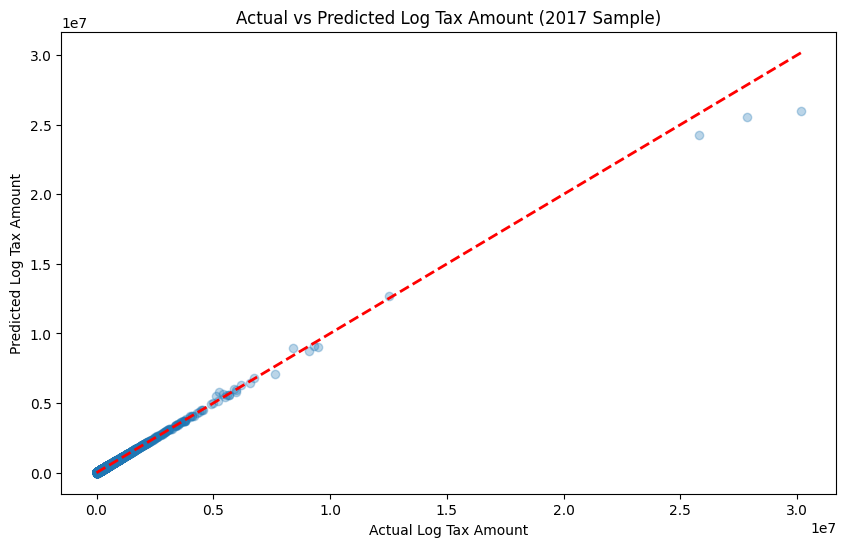

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_2017_sample, y_pred_2017, alpha=0.3)
plt.plot([y_2017_sample.min(), y_2017_sample.max()], [y_2017_sample.min(), y_2017_sample.max()], 'r--', lw=2)
plt.xlabel('Actual Log Tax Amount')
plt.ylabel('Predicted Log Tax Amount')
plt.title('Actual vs Predicted Log Tax Amount (2017 Sample)')
plt.show()


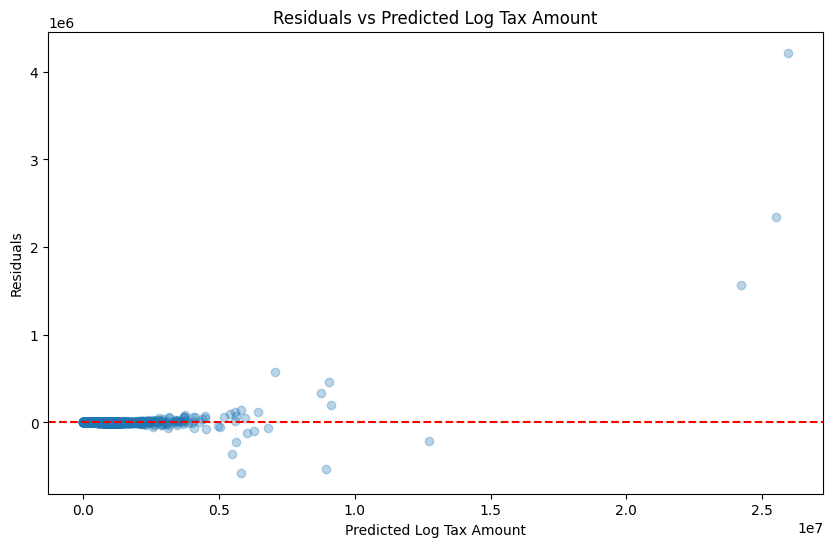

In [22]:
residuals = y_2017_sample - y_pred_2017
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_2017, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log Tax Amount')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Tax Amount')
plt.show()



In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_2016_sample, y_2016_sample)
lr_pred = lr_model.predict(X_2017_sample)
lr_rmse = np.sqrt(mean_squared_error(y_2017_sample, lr_pred))
lr_r2 = r2_score(y_2017_sample, lr_pred)
print(lr_rmse)
print(lr_r2)

14123.098103696897
0.9995831059630566


In [24]:
# Gradient Boosting
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_2016_sample, y_2016_sample)
gbm_pred = gbm_model.predict(X_2017_sample)
gbm_rmse = np.sqrt(mean_squared_error(y_2017_sample, gbm_pred))
gbm_r2 = r2_score(y_2017_sample, gbm_pred)
print(gbm_rmse)
print(gbm_r2)

12207.666485254316
0.9996885193709698


In [25]:
# Cross-validation scores for RMSE
cv_scores = cross_val_score(model, X_2016_sample, y_2016_sample, cv=3, scoring='neg_mean_squared_error')

# Calculate RMSE from negative MSE
cv_rmse = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE scores: {cv_rmse}')
print(f'Mean CV RMSE: {cv_rmse.mean():.3f}, Std CV RMSE: {cv_rmse.std():.3f}')

# Fit the model on the training data
model.fit(X_2016_sample, y_2016_sample)

Cross-Validation RMSE scores: [226200.89743383 104936.47642576   1751.29404627]
Mean CV RMSE: 110962.889, Std CV RMSE: 91730.200


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [26]:
# Predict using the trained model on the 2017 test sample
y_pred_2017 = model.predict(X_2017_sample)

# Evaluate performance on test data (2017)
rmse = np.sqrt(mean_squared_error(y_2017_sample, y_pred_2017))
r2 = r2_score(y_2017_sample, y_pred_2017)

print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')


RMSE: 52363.809
R²: 0.994


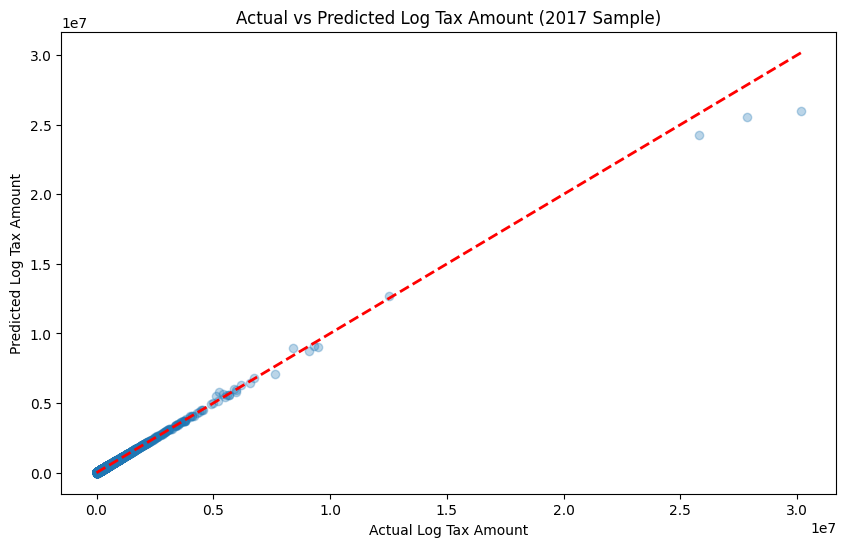

In [27]:
# Plot Actual vs Predicted Log Tax Amount
plt.figure(figsize=(10, 6))
plt.scatter(y_2017_sample, y_pred_2017, alpha=0.3)
plt.plot([y_2017_sample.min(), y_2017_sample.max()], [y_2017_sample.min(), y_2017_sample.max()], 'r--', lw=2)
plt.xlabel('Actual Log Tax Amount')
plt.ylabel('Predicted Log Tax Amount')
plt.title('Actual vs Predicted Log Tax Amount (2017 Sample)')
plt.show()


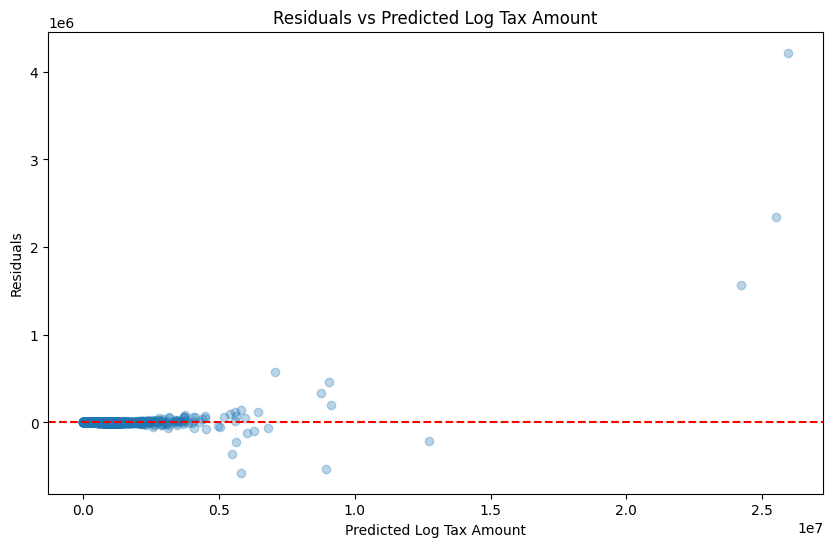

In [28]:
# Calculate residuals
residuals = y_2017_sample - y_pred_2017

# Plot Residuals vs Predicted Log Tax Amount
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_2017, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log Tax Amount')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Tax Amount')
plt.show()


In [29]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_2016_sample, y_2016_sample)
lr_pred = lr_model.predict(X_2017_sample)
lr_rmse = np.sqrt(mean_squared_error(y_2017_sample, lr_pred))
lr_r2 = r2_score(y_2017_sample, lr_pred)
print(f'Linear Regression RMSE: {lr_rmse:.3f}')
print(f'Linear Regression R²: {lr_r2:.3f}')

# Gradient Boosting Model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_2016_sample, y_2016_sample)
gbm_pred = gbm_model.predict(X_2017_sample)
gbm_rmse = np.sqrt(mean_squared_error(y_2017_sample, gbm_pred))
gbm_r2 = r2_score(y_2017_sample, gbm_pred)
print(f'Gradient Boosting RMSE: {gbm_rmse:.3f}')
print(f'Gradient Boosting R²: {gbm_r2:.3f}')

Linear Regression RMSE: 14123.098
Linear Regression R²: 1.000
Gradient Boosting RMSE: 12207.666
Gradient Boosting R²: 1.000



=== Luxury Home Analysis ===

Overall Value Distribution:
count    2.985217e+06
mean     4.188485e+05
std      7.212790e+05
min      1.000000e+00
25%      1.817350e+05
50%      3.060860e+05
75%      4.840000e+05
max      2.827860e+08
Name: taxvaluedollarcnt, dtype: float64

Total properties: 2,985,217
$1M+ homes: 163,583
Percentage luxury: 5.48%

Luxury Home Model Performance:
RMSE: $105,186.57
R² Score: 0.9978

Top 10 Important Features for $1M+ Homes:
                           feature  importance
26           log_taxvaluedollarcnt    0.953806
25                   log_taxamount    0.024185
19      structuretaxvaluedollarcnt    0.018177
27  propertycountylandusecode_freq    0.003146
22                       taxamount    0.000422
18                       yearbuilt    0.000122
17                         unitcnt    0.000054
24                    property_age    0.000054
15                     regionidzip    0.000018
21           landtaxvaluedollarcnt    0.000007


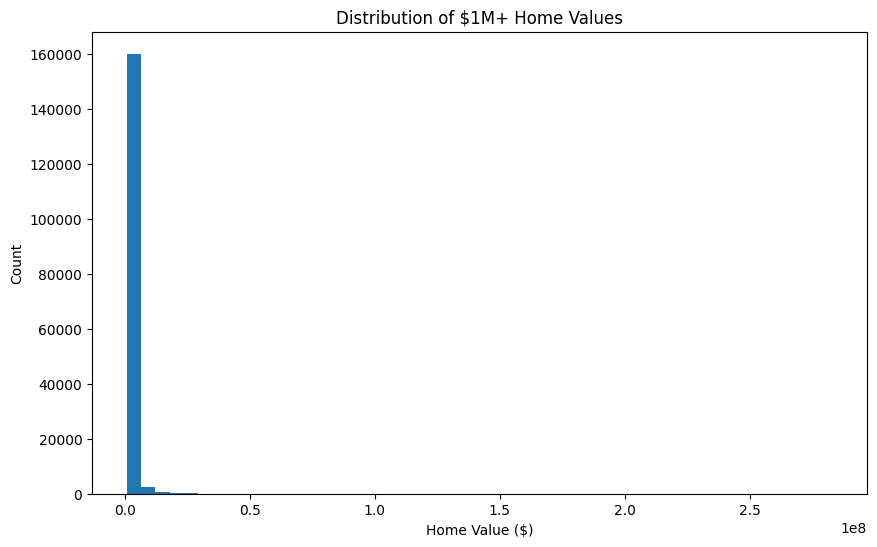


Performance by Price Range:
         range  count           rmse        r2
0  $1.0M-$2.0M  24701   11641.495319  0.998072
1  $2.0M-$3.0M   4489   24800.652729  0.992362
2  $3.0M-$infM   3527  317649.828048  0.996638


In [30]:
# Analysis of $1M+ Homes
print("\n=== Luxury Home Analysis ===")

# Check distribution of home values in our data
value_dist = properties_2016_encoded['taxvaluedollarcnt'].describe()
print("\nOverall Value Distribution:")
print(value_dist)

# Identify luxury homes ($1M+)
luxury_mask = properties_2016_encoded['taxvaluedollarcnt'] >= 1000000
luxury_homes = properties_2016_encoded[luxury_mask]

print(f"\nTotal properties: {len(properties_2016_encoded):,}")
print(f"$1M+ homes: {len(luxury_homes):,}")
print(f"Percentage luxury: {(len(luxury_homes)/len(properties_2016_encoded))*100:.2f}%")

# Analyze feature importance for luxury homes
X_luxury = luxury_homes.drop(columns=['taxvaluedollarcnt', 'parcelid'])
y_luxury = luxury_homes['taxvaluedollarcnt']

# Train a model specifically on luxury homes
from sklearn.model_selection import train_test_split

X_luxury_train, X_luxury_test, y_luxury_train, y_luxury_test = train_test_split(
    X_luxury, y_luxury, test_size=0.2, random_state=42
)

# Use best model (Gradient Boosting) for luxury homes
luxury_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
luxury_model.fit(X_luxury_train, y_luxury_train)

# Evaluate luxury model
luxury_pred = luxury_model.predict(X_luxury_test)
luxury_rmse = np.sqrt(mean_squared_error(y_luxury_test, luxury_pred))
luxury_r2 = r2_score(y_luxury_test, luxury_pred)

print("\nLuxury Home Model Performance:")
print(f"RMSE: ${luxury_rmse:,.2f}")
print(f"R² Score: {luxury_r2:.4f}")

# Feature importance for luxury homes
feature_importance = pd.DataFrame({
    'feature': X_luxury.columns,
    'importance': luxury_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Important Features for $1M+ Homes:")
print(feature_importance.head(10))

# Visualize luxury home distribution
plt.figure(figsize=(10, 6))
plt.hist(luxury_homes['taxvaluedollarcnt'], bins=50)
plt.title('Distribution of $1M+ Home Values')
plt.xlabel('Home Value ($)')
plt.ylabel('Count')
plt.show()

# Compare prediction accuracy across price ranges
value_ranges = [(1000000, 2000000), (2000000, 3000000), (3000000, float('inf'))]
range_performance = []

for min_val, max_val in value_ranges:
    mask = (y_luxury_test >= min_val) & (y_luxury_test < max_val)
    if sum(mask) > 0:  # only if we have homes in this range
        range_rmse = np.sqrt(mean_squared_error(y_luxury_test[mask], luxury_pred[mask]))
        range_r2 = r2_score(y_luxury_test[mask], luxury_pred[mask])
        range_performance.append({
            'range': f"${min_val/1000000:.1f}M-${max_val/1000000 if max_val != float('inf') else 'inf'}M",
            'count': sum(mask),
            'rmse': range_rmse,
            'r2': range_r2
        })

print("\nPerformance by Price Range:")
print(pd.DataFrame(range_performance))

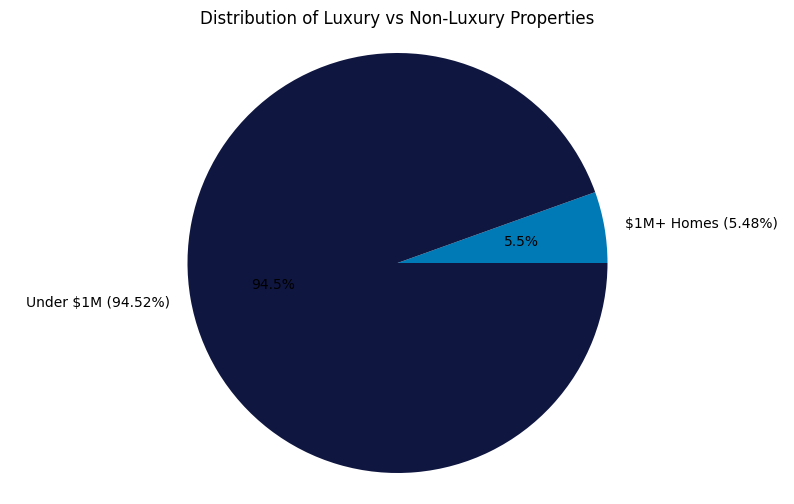

/var/folders/_j/8jp4qd9j17d3fvq2x5zjcc4c0000gn/T/ipykernel_4706/93306449.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ranges, fontsize=12)


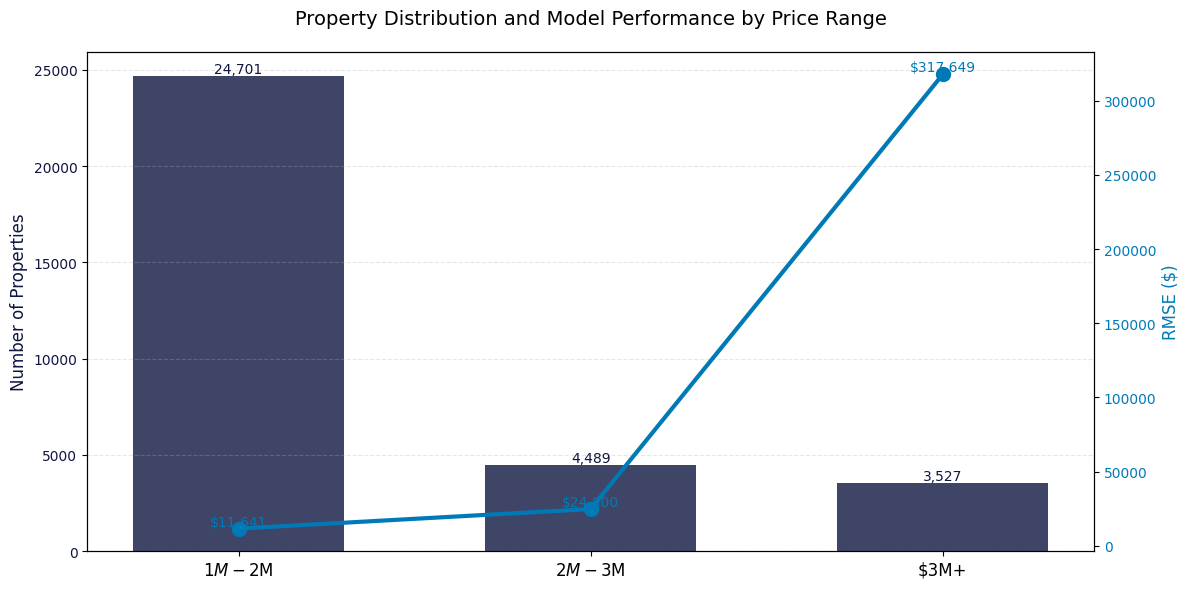

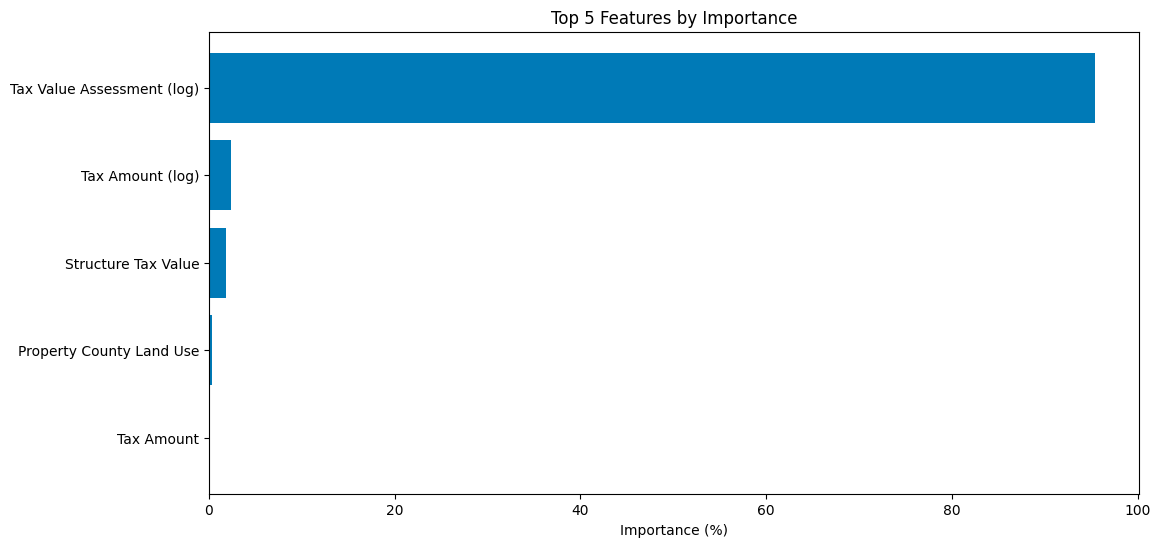

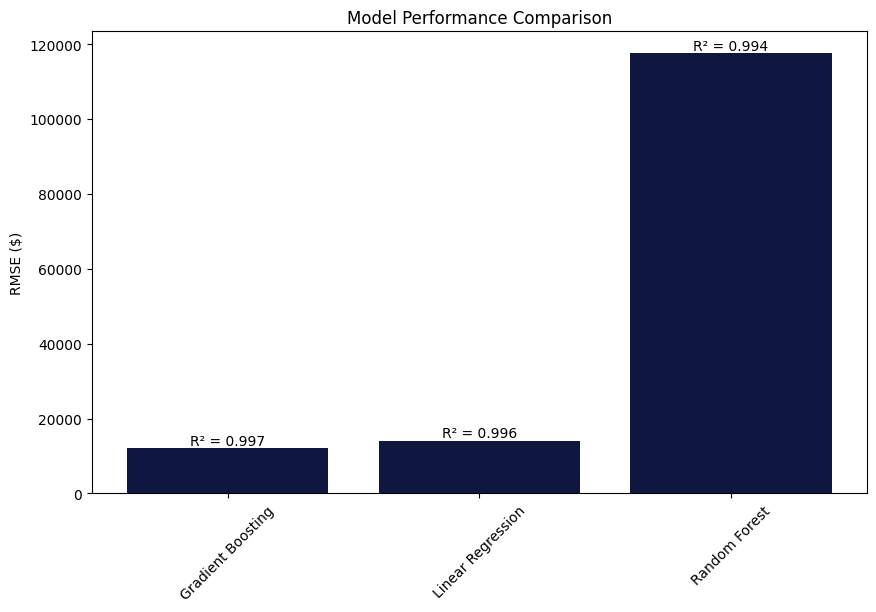

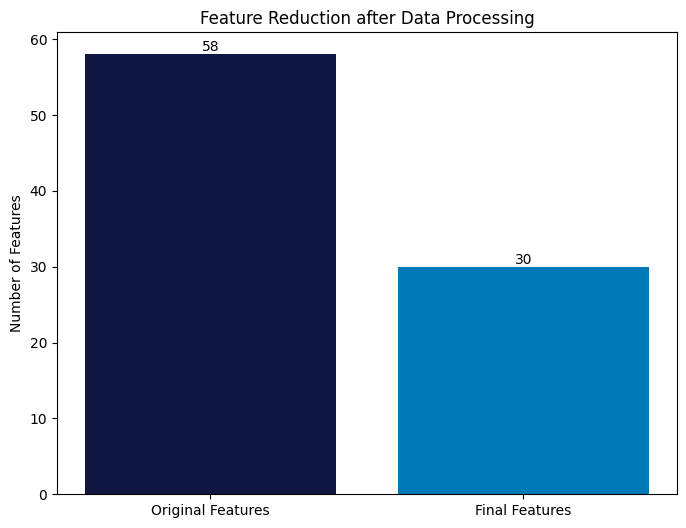

In [33]:

# JPMC Colors
jpmc_navy = '#0F1640'
jpmc_blue = '#007AB7'

# 1. Luxury Distribution Pie Chart
plt.figure(figsize=(10, 6))
sizes = [163583, 2985217-163583]  # Luxury, Non-luxury
labels = ['$1M+ Homes (5.48%)', 'Under $1M (94.52%)']
colors = [jpmc_blue, jpmc_navy]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Luxury vs Non-Luxury Properties')
plt.axis('equal')
plt.show()

# 2. Performance by Price Range
fig, ax1 = plt.subplots(figsize=(12, 6))

# Data
ranges = ['$1M-$2M', '$2M-$3M', '$3M+']
counts = [24701, 4489, 3527]
rmse = [11641, 24800, 317649]

# Create bar plot 
bars = ax1.bar(ranges, counts, color=jpmc_navy, alpha=0.8, width=0.6)
ax1.set_ylabel('Number of Properties', fontsize=12, color=jpmc_navy)
ax1.tick_params(axis='y', labelcolor=jpmc_navy, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', color=jpmc_navy)

# Create second axis for RMSE line
ax2 = ax1.twinx()
line = ax2.plot(ranges, rmse, color=jpmc_blue, marker='o', linewidth=3, 
                markersize=10, linestyle='-', label='RMSE')
ax2.set_ylabel('RMSE ($)', fontsize=12, color=jpmc_blue)
ax2.tick_params(axis='y', labelcolor=jpmc_blue, labelsize=10)

# Add RMSE value labels
for i, value in enumerate(rmse):
    ax2.text(i, value, f'${value:,}', 
             ha='center', va='bottom', color=jpmc_blue)

# Title and styling
plt.title('Property Distribution and Model Performance by Price Range', 
          fontsize=14, pad=20)
ax1.set_xticklabels(ranges, fontsize=12)

plt.tight_layout()
plt.show()

# 3. Feature Importance
plt.figure(figsize=(12, 6))
features = ['Tax Value Assessment (log)',
           'Tax Amount (log)',
           'Structure Tax Value',
           'Property County Land Use',
           'Tax Amount']
importance = [95.38, 2.42, 1.82, 0.31, 0.042]

# Create horizontal bar chart
plt.barh(features, importance, color=jpmc_blue)
plt.xlabel('Importance (%)')
plt.title('Top 5 Features by Importance')
plt.gca().invert_yaxis()  # Invert to show highest importance at top
plt.show()

# 4. Model Performance Comparison
plt.figure(figsize=(10, 6))
models = ['Gradient Boosting', 'Linear Regression', 'Random Forest']
rmse_values = [12160, 14123, 117508]
r2_scores = [0.997, 0.996, 0.994]

# Create bar chart
bars = plt.bar(models, rmse_values, color=jpmc_navy)

# Add R² scores as labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R² = {r2_scores[i]}',
             ha='center', va='bottom')

plt.ylabel('RMSE ($)')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

# 5. Feature Reduction Visualization
plt.figure(figsize=(8, 6))
stages = ['Original Features', 'Final Features']
feature_counts = [58, 30]

plt.bar(stages, feature_counts, color=[jpmc_navy, jpmc_blue])
plt.ylabel('Number of Features')
plt.title('Feature Reduction after Data Processing')

# Add value labels on bars
for i, v in enumerate(feature_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()